In this note, we find distribution of given data and then compare the results.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kstest
from scipy.stats import gamma, beta, norm, lognorm, t, weibull_min, expon
import scipy
import scipy.stats
import seaborn as sns
from termcolor import colored
plt.style.use('seaborn')

In [31]:
"""Generate data"""

data = t.rvs(df=2, loc=5, scale=1, size=100000)

We use 7 known distributions to fit to the data and then use the KS test as a criteria to see which distribution is the closest to the true distribution of data.

In [36]:
"""Distribution of data: sanity check"""

dist_names = ['gamma', 'beta', 'norm', 't', 'lognorm', 'weibull_min', 'expon']
param={}

for i, dist_name in enumerate(dist_names):
    dist = getattr(scipy.stats, dist_name)
    param[i] = dist.fit(data)
    test = kstest(data, dist_names[i], [*param[i]])
    print(colored('{} distribution parameters:','red').format(dist_names[i]),
          param[i],colored('and', 'blue'), test)    
    

gamma distribution parameters: (0.010479967869196867, -49.09252000494979, 3.016293067397547) and KstestResult(statistic=0.999677937150791, pvalue=0.0)
beta distribution parameters: (78520.21398409092, 38646.6559615209, -1595.3476102542404, 2388.016106889593) and KstestResult(statistic=0.18625505836934395, pvalue=0.0)
norm distribution parameters: (5.000449958690387, 3.2826233082596175) and KstestResult(statistic=0.18636360482793543, pvalue=0.0)
t distribution parameters: (2.011671611400641, 4.999076314366247, 1.012751490136879) and KstestResult(statistic=0.0012329107888587598, pvalue=0.9980398790477456)
lognorm distribution parameters: (0.0005420763680597396, -6074.516701913859, 6079.525893461427) and KstestResult(statistic=0.18797296415837084, pvalue=0.0)
weibull_min distribution parameters: (0.16026461541199077, -271.2485850814214, 1.7991720430318203) and KstestResult(statistic=0.8896284978692799, pvalue=0.0)
expon distribution parameters: (-271.24858508142137, 276.2490350401118) and

As we should expect t-student distribution has the least statistics and the greatest p-value among other distributions. It also correctly returns df, loc and scale of data.

In [52]:
gamma_samples = gamma.rvs(*param[0], size=100000)
beta_samples = beta.rvs(*param[1], size=100000)
norm_samples = norm.rvs(*param[2], size=100000)
t_samples = t.rvs(*param[3], size=100000)
lognorm_samples = lognorm.rvs(*param[4], size=100000)
weibul_samples = weibull_min.rvs(*param[5], size=100000)
expon_samples = expon.rvs(*param[6], size=100000)

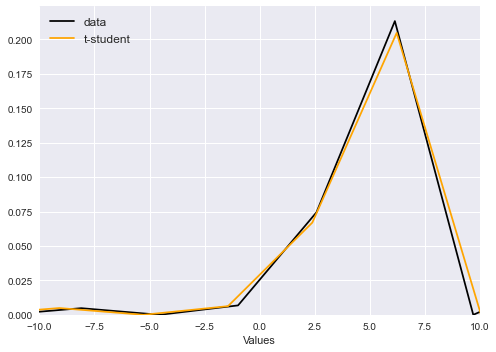

In [32]:
fig, ax = plt.subplots(1, figsize=(7,5))
sns.kdeplot(data, label='data', color='black')
sns.kdeplot(t_samples, label='t-student', color='orange')
ax.legend(fontsize=12)
ax.set_xlabel('Values')
ax.set_xlim([-10,10])
plt.tight_layout()

We also compare the data with normal distribution and parameters given in the previous cells. 

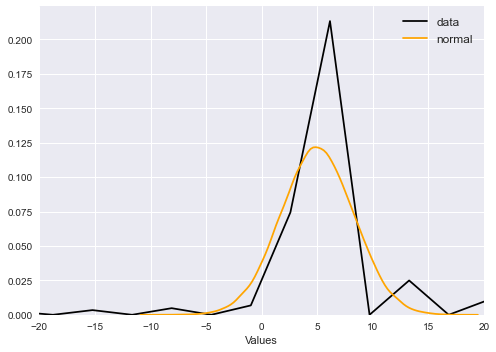

In [39]:
fig, ax = plt.subplots(1, figsize=(7,5))
sns.kdeplot(data, label='data', color='black')
sns.kdeplot(norm_samples, label='normal', color='orange')
ax.legend(fontsize=12)
ax.set_xlabel('Values')
ax.set_xlim([-20,20])
plt.tight_layout()